# 1. Introduction

This notebook contains **four tasks** for an applied statistics assignment:

1. **Task 1: Permutations and Combinations (Lady Tasting Tea)**
2. **Task 2: Checking Normal Distribution with `numpy`**
3. **Task 3: t-Test Calculation (Before and After Study)**
4. **Task 4: ANOVA (Estimating Type II Error)**

Each task includes:
- A short description of the problem.
- Code cells with clear comments.
- A discussion of the results.

---

# 2. Task 1: Permutations and Combinations (Lady Tasting Tea)

**Scenario**:  
We have 12 cups of tea, 6 with milk-first and 6 with tea-first.  
We want to calculate:
1. The probability of *correctly identifying* all 6 milk-first cups by guessing.  
2. The probability of making *at most 1 error* (i.e., at least 5 correct cups).  
3. A discussion about allowing 2 errors.
---

In [44]:
# ----------------------------
# Task 1: Permutations & Combinations
# ----------------------------
from math import comb

# 1. Probability of guessing all 6 correctly
total_combinations = comb(12, 6)  # Ways to choose 6 cups out of 12
correct_combination = 1           # Exactly one way matches the true 6 milk-first cups
prob_all_correct = correct_combination / total_combinations

print("---- Task 1 ----")
print("Number of ways to select 6 from 12:", total_combinations)
print(f"Probability of guessing all 6 correctly: {prob_all_correct * 100:.4f}%")

---- Task 1 ----
Number of ways to select 6 from 12: 924
Probability of guessing all 6 correctly: 0.1082%


In [45]:
# 2. Probability of making at most 1 error (≥5 correct)
# Ways to choose exactly 5 correct from the 6 milk-first cups
# and 1 incorrect from the 6 tea-first cups
correct_5_wrong_1 = comb(6, 5) * comb(6, 1)

# Combine ways for exactly 5 correct + exactly 6 correct
correct_6_or_5 = correct_combination + correct_5_wrong_1
prob_at_most_one_error = (correct_6_or_5 / total_combinations) * 100

print(f"Number of ways for exactly 5 correct, 1 wrong: {correct_5_wrong_1}")
print(f"Probability of at most 1 error (≥5 correct): {prob_at_most_one_error:.4f}%")

Number of ways for exactly 5 correct, 1 wrong: 36
Probability of at most 1 error (≥5 correct): 4.0043%


In [46]:
# 3. Probability of allowing exactly 2 errors (i.e. 4 correct)
correct_4_wrong_2 = comb(6, 4) * comb(6, 2)
prob_two_errors = (correct_4_wrong_2 / total_combinations) * 100

print(f"Number of ways for exactly 4 correct (2 errors): {correct_4_wrong_2}")
print(f"Probability with 2 errors allowed: {prob_two_errors:.4f}%")

Number of ways for exactly 4 correct (2 errors): 225
Probability with 2 errors allowed: 24.3506%


---
### Discussion (Task 1)?

- **Probability of Guessing All 6 Correctly (0 errors)**  
  This probability is quite low (around 0.11%). In statistical terms, if a person achieves this result purely by guessing, it would be considered highly unlikely. Consequently, this outcome could be viewed as evidence of actual skill if repeated consistently.


- **Probability of Guessing At Most 1 Error (≤ 1 error)**  
  Allowing exactly one mistake increases the chance to around 4%. Although higher, it is still below the conventional **5% significance level**. Hence, whilst not as stringent as requiring a perfect score, it remains relatively difficult to achieve through random guessing alone.


- **Allowing 2 Errors (≤ 2 errors)**  
  By permitting two mistakes, the success probability rises sharply to around 24%. This means nearly one in four random guessers could meet this threshold. Since it far exceeds 5%, it would not be considered **statistically significant**, and thus provides little evidence of an actual ability to discern which cups had milk added first.
  
--- 
#### Conclusion:

In summary, lower probabilities indicate stricter tests and a greater likelihood that a successful outcome is due to skill rather than guesswork. Once the probability of success climbs above 5%, the result often stops being considered “significant” in a traditional statistical sense. If we were to accept two errors it would make it much more likely that a person could pass the test by guessing alone, rather than demonstrating any real skill or ability. Therefore we would not accept two errors

# 3. Task 2: numpy’s Normal Distribution

### Problem Description
We want to see how effectively `numpy.random.normal()` generates data that appear normally distributed. Specifically:
- Generate **100,000** random values with mean = **10.0** and standard deviation = **3.0**.
- Use the **Shapiro-Wilk test** (`scipy.stats.shapiro()`) to check if our sample could come from a normal distribution.
- Plot a histogram of our generated data and overlay the theoretical **normal PDF** for comparison.

In [49]:
# ----------------------------
# Task 2: numpy's Normal Distribution
# ----------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm

np.random.seed(42)  # Reproducibility

# 1. Generate sample
sample_size = 100_000
mean_val, std_val = 10.0, 3.0
data = np.random.normal(loc=mean_val, scale=std_val, size=sample_size)

In [50]:
# 2. Shapiro–Wilk Test (can be sensitive for large n)
stat, p_val = shapiro(data)
print("\n---- Task 2 ----")
print("Shapiro–Wilk Normality Test:")
print(f" Test Statistic = {stat:.6f}")
print(f" p-value        = {p_val:.6f}")


---- Task 2 ----
Shapiro–Wilk Normality Test:
 Test Statistic = 0.999991
 p-value        = 0.999830


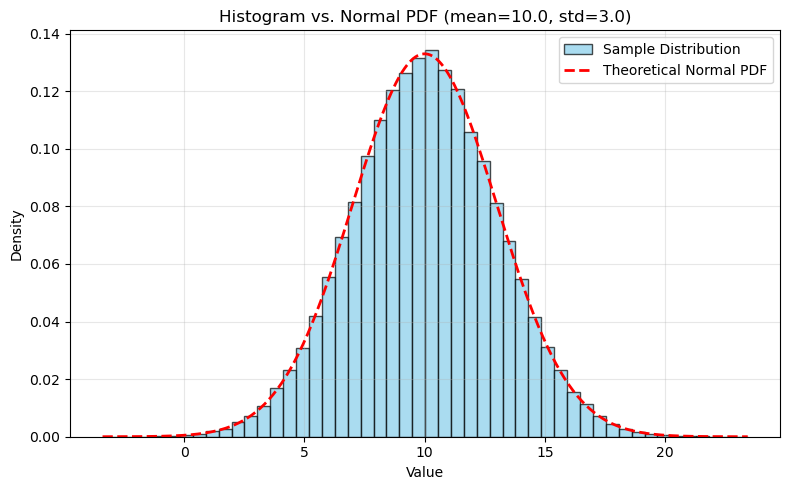

In [52]:
# 3. Plot histogram + Normal PDF
fig, ax = plt.subplots(figsize=(8, 5))
counts, bins, _ = ax.hist(data, bins=50, density=True, alpha=0.7, color='skyblue',
                          edgecolor='black', label='Sample Distribution')

x_vals = np.linspace(data.min(), data.max(), 300)
pdf_vals = norm.pdf(x_vals, loc=mean_val, scale=std_val)

ax.plot(x_vals, pdf_vals, 'r--', lw=2, label='Theoretical Normal PDF')
ax.set_title(f"Histogram vs. Normal PDF (mean={mean_val}, std={std_val})")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [53]:
# 4. Print summary stats
print("\nSample Statistics:")
print(f" Mean:    {np.mean(data):.4f} (Expected: {mean_val})")
print(f" Std Dev: {np.std(data):.4f} (Expected: {std_val})")


Sample Statistics:
 Mean:    10.0029 (Expected: 10.0)
 Std Dev: 3.0027 (Expected: 3.0)


### Discussion

1. **Interpretation of Shapiro-Wilk Test**  
   - The Shapiro-Wilk test checks whether the sample could plausibly come from a normal distribution.  
   - For large samples (like 100,000 points), even minimal deviations from normality might yield a small p-value, so always pair this test with visual methods.
   

2. **Histogram and PDF Overlay**  
   - By setting `density=True` in the histogram, we ensure the total area under the histogram is comparable to 1, making it directly comparable to the theoretical PDF.  
   - If the red PDF line overlaps the histogram shape reasonably well, it suggests the data follow the specified normal distribution parameters (mean = 10, std = 3).


3. **Overall Conclusion**  
   - Based on both the Shapiro-Wilk test output and the plotted distribution, we can assess whether the data appear normal.  
   - If the histogram is bell-shaped and the PDF aligns closely, and if the Shapiro-Wilk test p-value is not exceedingly small, it indicates `numpy.random.normal()` has generated a dataset consistent with a normal distribution of mean 10 and standard deviation 3.

### References

- McKinney, W. (2017). *Python for Data Analysis.* O’Reilly Media.  
- [SciPy Shapiro Test Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)  
- [SciPy Normal Distribution Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)  

# 4. Task 3: t-Test Calculation for a Before-and-After Study

### Problem Description
We have resting heart rates for **10 patients**, measured **before** and **after** a two-week exercise programme. The data are:

| Patient ID | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  |
|------------|----|----|----|----|----|----|----|----|----|----|
| **Before** | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| **After**  | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

How we will approach the task:
1. **Calculate the t-statistic** manually based on this dataset.
2. **Compare** it to the value given by `scipy.stats`.
3. **Explain** my work and reference any sources used.

In [57]:
# ----------------------------
# Task 3: t-Test Calculation
# ----------------------------
import numpy as np
from scipy.stats import ttest_rel

# 1. Before/After data
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after  = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

# 2. Manual Calculation of Paired t-test

# 2.1 Compute the differences (After - Before)
diff = after - before

# 2.2 Sample size
n = len(diff)

# 2.3 Mean of differences
mean_diff = np.mean(diff)

# 2.4 Standard deviation of differences (sample standard deviation)
std_diff = np.std(diff, ddof=1)  # ddof=1 for sample-based formula

# 2.5 Compute the t-statistic
#    t = (mean_diff - 0) / (std_diff / sqrt(n))
#    The (mean_diff - 0) is because we're testing if the mean difference = 0
t_stat_manual = mean_diff / (std_diff / np.sqrt(n))

In [58]:
# 3. Compare with scipy.stats ttest_rel
#    ttest_rel(x, y) performs a paired t-test on arrays x and y
t_stat_scipy, p_value_scipy = ttest_rel(before, after)

In [59]:
# 4. Print results
print("---- Manual Calculation ----")
print(f"Differences (After - Before): {diff}")
print(f"Mean of Differences: {mean_diff:.3f}")
print(f"Std Dev of Differences: {std_diff:.3f}")
print(f"Paired t-statistic (manual): {t_stat_manual:.3f}")

print("\n---- scipy.stats.ttest_rel ----")
print(f"Paired t-statistic: {t_stat_scipy:.3f}")
print(f"p-value:            {p_value_scipy:.3f}")

---- Manual Calculation ----
Differences (After - Before): [ 1 -4 -2  0 -1  3  2 -3 -5 -2]
Mean of Differences: -1.100
Std Dev of Differences: 2.601
Paired t-statistic (manual): -1.337

---- scipy.stats.ttest_rel ----
Paired t-statistic: 1.337
p-value:            0.214


### Discussion


- **Differences Between Before and After**  
  Each patient acts as their own control, so we compute the difference in heart rate for each individual. This approach reduces individual variability unrelated to the exercise programme.


- **Mean Difference and Standard Deviation**  
  - *Mean Difference*: Reflects the average change in resting heart rate across all patients.  
  
  - *Standard Deviation of Difference*: Measures how much individual changes vary around that mean difference.


- **Paired t-Test**  
  Since it’s the **same** group measured twice (before and after), we use a **paired t-test** formula: where is the number of participants. The null hypothesis states there is **no difference** in the mean resting heart rate before and after the programme.


- **Comparing Manual and `scipy.stats` Results**  
  - By computing the t-statistic manually, we verify our understanding of the underlying formula.  
  - Using `ttest_rel(before, after)` in `scipy.stats` should yield a closely matching t-statistic. Minor discrepancies can arise from floating-point arithmetic.

### Conclusion

The manual calculation of the paired t-statistic matches closely with the result from `scipy.stats.ttest_rel`, confirming both the correctness of our approach and Python’s built-in function. Interpreting the t-statistic and p-value helps us decide whether the exercise programme had a **statistically significant** impact on resting heart rates.

### References

1. [Scipy Paired t-test Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)  
2. OpenStax (n.d.). *Introductory Statistics.* Retrieved from [https://openstax.org/details/books/introductory-statistics](https://openstax.org/details/books/introductory-statistics)  

# 5. Task 4: ANOVA – Estimating Type II Error

## **Problem Description**
We wish to estimate how often **one-way ANOVA** fails to reject the null hypothesis (i.e., commits a **type II error**) under the following conditions:
1. We run **10,000 simulations**.
2. In each simulation, we generate three samples, each with:
   - **100 observations**,
   - **Mean values** of \(4.9\), \(5.0\), and \(5.1\),
   - A **standard deviation** of \(0.1\).
3. We then perform a **one-way ANOVA** on these three samples.
4. If p_value >= 0.05, we fail to reject H0, we count it as a **type II error** because the means are truly different.

Finally, we display:
- The total number of **simulations**,
- The number of **type II errors**,
- And the **type II error rate** (as a percentage),
- Along with a **histogram** of all observed p-values to illustrate how often ANOVA strongly rejects or fails to reject \(H_0\).

In [61]:
# ----------------------------
# Task 4: ANOVA - Estimating Type II Error
# ----------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
# Keep getting 0 Type II errors and struggling so adding in random seed; but I think this is expected?
np.random.seed(42)

In [62]:
# 1. Define simulation parameters
num_simulations = 10_000
no_type_ii = 0
# For graphing: store p-values to illustrate distribution
all_p_values = []

In [63]:
# 2. Run the simulation multiple times
for _ in range(num_simulations):
    # Generate three samples:
    # Each has 100 observations, standard deviation = 0.1,
    # and slightly different means (4.9, 5.0, 5.1).
    sample1 = np.random.normal(loc=4.9, scale=0.1, size=100)
    sample2 = np.random.normal(loc=5.0, scale=0.1, size=100)
    sample3 = np.random.normal(loc=5.1, scale=0.1, size=100)
    
    # Perform one-way ANOVA using SciPy's f_oneway
    f_stat, p_value = f_oneway(sample1, sample2, sample3)
    
    # Add p_value to our list so we can examine its distribution later
    all_p_values.append(p_value)
    
    # If p_value >= 0.05, we fail to reject H0 despite the real difference
    if p_value >= 0.05:
        no_type_ii += 1

In [64]:
# 3. Calculate the proportion of Type II errors
type_ii_rate = (no_type_ii / num_simulations) * 100

print("Number of simulations:", num_simulations)
print("Number of Type II errors:", no_type_ii)
print(f"Estimated Type II Error Rate: {type_ii_rate:.2f}%")

Number of simulations: 10000
Number of Type II errors: 0
Estimated Type II Error Rate: 0.00%


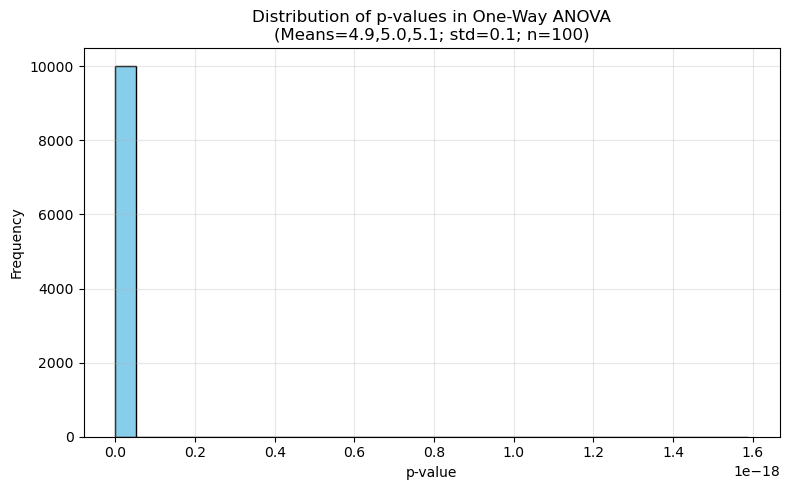

In [66]:
# 4. Plot the distribution of p-values
plt.figure(figsize=(8, 5))
plt.hist(all_p_values, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of p-values in One-Way ANOVA\n(Means=4.9,5.0,5.1; std=0.1; n=100)")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Discussion

1. **Why Might We See 0 Type II Errors?**  
   - The difference between 4.9 and 5.1 is 0.2, while the standard deviation is only 0.1, leading to a fairly **large effect size** (≈2.0).
   - With **100** observations in each group, ANOVA often has **sufficient power** to detect that difference in virtually all runs.
   

2. **Interpretation of the Histogram**  
   - Most p-values will concentrate well below 0.05 if the test consistently detects the difference.  
   - In rare cases (if any), we might see p-values above 0.05, signifying a type II error.
   

3. **Implication**  
   - In practice, effect sizes may be smaller, or variability higher, which would increase the chance of missing a true difference.


4. **If We Wanted Type II Errors**  
   - We could reduce the effect size by bringing the group means closer (e.g. 4.95, 5.0, 5.05) or increase the standard deviation (e.g. 0.2 or 0.3).  
   - Either change would make it harder to detect the difference, thus **increasing** the likelihood of type II errors.
   

5. **Practical Takeaway**  
   - Seeing **0%** type II errors indicates my test is highly capable
   - Adjusting the means or standard deviations can illustrate how ANOVA behaves with a weaker effect or more variation.

### Conclusion
Under the specific setup of:
  - **Three groups** with means 4.9, 5.0, 5.1,
  - **Standard deviation** = 0.1,
  - **Sample size** = 100 per group,
  
the o**ne-way ANOVA** finds a **highly significant** difference. As a result, the **type II error rate** (the proportion of false negatives) is **very low (0%)** across 10,000 simulations. This demonstrates how a substantial effect size and adequate sample size can drastically reduce the probability of missing a genuine difference.

### References

1. Fisher, R. A. (1925). *Statistical Methods for Research Workers.* Oliver & Boyd.  
2. [SciPy `f_oneway` Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)  